In [33]:
library(scRNAseq)
library(scater)
sce.416b <- LunSpikeInData(which="416b") 

snapshotDate(): 2022-10-31

see ?scRNAseq and browseVignettes('scRNAseq') for documentation

loading from cache

see ?scRNAseq and browseVignettes('scRNAseq') for documentation

loading from cache

see ?scRNAseq and browseVignettes('scRNAseq') for documentation

loading from cache

snapshotDate(): 2022-10-31

see ?scRNAseq and browseVignettes('scRNAseq') for documentation

loading from cache

snapshotDate(): 2022-10-31

loading from cache



In [3]:
sce.416b

class: SingleCellExperiment 
dim: 46604 192 
metadata(0):
assays(1): counts
rownames(46604): ENSMUSG00000102693 ENSMUSG00000064842 ...
  ENSMUSG00000095742 CBFB-MYH11-mcherry
rowData names(1): Length
colnames(192): SLX-9555.N701_S502.C89V9ANXX.s_1.r_1
  SLX-9555.N701_S503.C89V9ANXX.s_1.r_1 ...
  SLX-11312.N712_S508.H5H5YBBXX.s_8.r_1
  SLX-11312.N712_S517.H5H5YBBXX.s_8.r_1
colData names(9): Source Name cell line ... spike-in addition block
reducedDimNames(0):
mainExpName: endogenous
altExpNames(2): ERCC SIRV

# Common choices of QC metrics

In [34]:
# Identifying the mitochondrial transcripts in our SingleCellExperiment.
location <- rowRanges(sce.416b)
is.mito <- any(seqnames(location)=="MT")

library(scuttle)

Users may prefer to use the `addPerCellQC()` function. This computes and appends the per-cell QC statistics to the colData of the SingleCellExperiment object, allowing us to retain all relevant information in a single object for later manipulation.

In [35]:
sce.416b <- addPerCellQCMetrics(sce.416b, subsets=list(Mito=is.mito))
colnames(colData(sce.416b))

[1] "Source Name"              "cell line"               
 [3] "cell type"                "single cell well quality"
 [5] "genotype"                 "phenotype"               
 [7] "strain"                   "spike-in addition"       
 [9] "block"                    "sum"                     
[11] "detected"                 "subsets_Mito_sum"        
[13] "subsets_Mito_detected"    "subsets_Mito_percent"    
[15] "altexps_ERCC_sum"         "altexps_ERCC_detected"   
[17] "altexps_ERCC_percent"     "altexps_SIRV_sum"        
[19] "altexps_SIRV_detected"    "altexps_SIRV_percent"    
[21] "total"

In [36]:
head(as.matrix(colData(sce.416b)[, 10: ncol(colData(sce.416b))]))

,sum,detected,subsets_Mito_sum,subsets_Mito_detected,subsets_Mito_percent,altexps_ERCC_sum,altexps_ERCC_detected,altexps_ERCC_percent,altexps_SIRV_sum,altexps_SIRV_detected,altexps_SIRV_percent,total
SLX-9555.N701_S502.C89V9ANXX.s_1.r_1,865936,7618,78790,20,9.098825,65278,39,6.806584,27828,7,2.901646,959042
SLX-9555.N701_S503.C89V9ANXX.s_1.r_1,1076277,7521,98613,20,9.162418,74748,40,6.280300,39173,7,3.291301,1190198
SLX-9555.N701_S504.C89V9ANXX.s_1.r_1,1180138,8306,100341,19,8.502480,60878,42,4.789493,30058,7,2.364772,1271074
SLX-9555.N701_S505.C89V9ANXX.s_1.r_1,1342593,8143,104882,20,7.811898,60073,42,4.185665,32542,7,2.267407,1435208
SLX-9555.N701_S506.C89V9ANXX.s_1.r_1,1668311,7154,129559,22,7.765878,136810,44,7.288871,71850,7,3.827976,1876971
SLX-9555.N701_S507.C89V9ANXX.s_1.r_1,1015866,6829,52294,22,5.147726,113350,41,9.554250,57167,7,4.818596,1186383


# Identifying low-quality cells

In [37]:
reasons <- perCellQCFilters(df, 
    sub.fields=c("subsets_Mito_percent", "altexps_ERCC_percent"))
colSums(as.matrix(reasons))

low_lib_size            low_n_features high_subsets_Mito_percent 
                        4                         0                         2 
high_altexps_ERCC_percent                   discard 
                        1                         6

In [38]:
summary(reasons$discard)

   Mode   FALSE    TRUE 
logical     186       6 

# Checking diagnostic plots

It is good practice to inspect the distributions of QC metrics (Figure 1.1) to identify possible problems. In the most ideal case, we would see normal distributions that would justify the 3 MAD threshold used in outlier detection. A large proportion of cells in another mode suggests that the QC metrics might be correlated with some biological state, potentially leading to the loss of distinct cell types during filtering; or that there were inconsistencies with library preparation for a subset of cells, a not-uncommon phenomenon in plate-based protocols.

In [39]:
colData(sce.416b) <- cbind(colData(sce.416b), df)
sce.416b$block <- factor(sce.416b$block)
sce.416b$phenotype <- ifelse(grepl("induced", sce.416b$phenotype),
    "induced", "wild type")

sce.416b$discard <- reasons$discard

In [53]:
options(repr.plot.width = 10, repr.plot.height = 10)

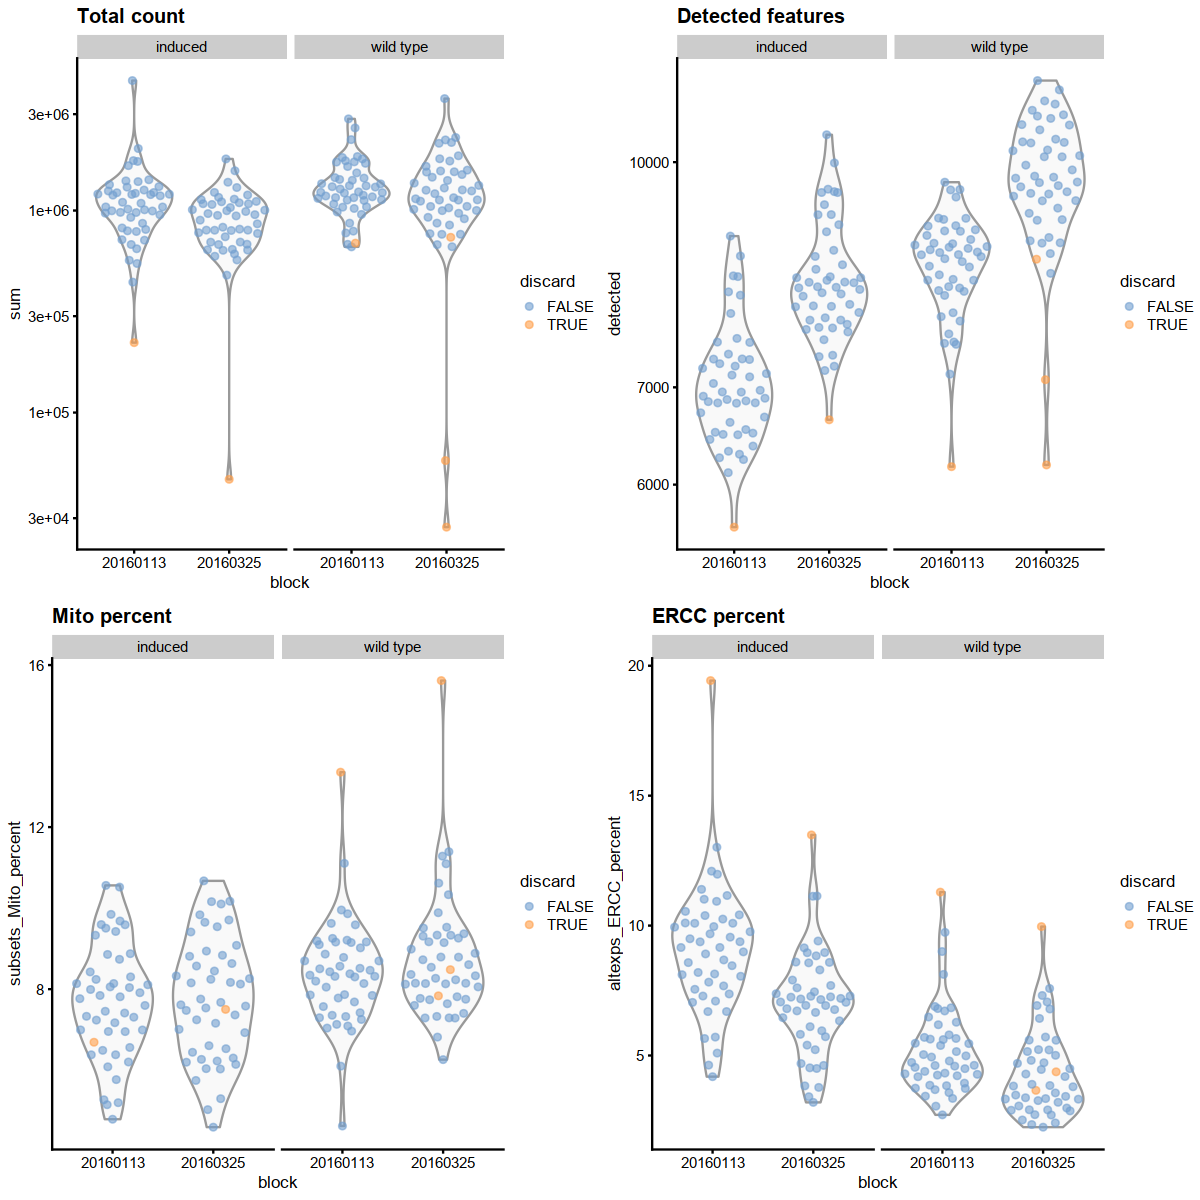

In [54]:
gridExtra::grid.arrange(
    plotColData(sce.416b, x="block", y="sum", colour_by="discard",
        other_fields="phenotype") + facet_wrap(~phenotype) + 
        scale_y_log10() + ggtitle("Total count"),
    plotColData(sce.416b, x="block", y="detected", colour_by="discard", 
        other_fields="phenotype") + facet_wrap(~phenotype) + 
        scale_y_log10() + ggtitle("Detected features"),
    plotColData(sce.416b, x="block", y="subsets_Mito_percent", 
        colour_by="discard", other_fields="phenotype") + 
        facet_wrap(~phenotype) + ggtitle("Mito percent"),
    plotColData(sce.416b, x="block", y="altexps_ERCC_percent", 
        colour_by="discard", other_fields="phenotype") + 
        facet_wrap(~phenotype) + ggtitle("ERCC percent"),
    ncol=1,
    layout_matrix=rbind(c(1, 2), c(3, 4))
)

# Removing low-quality cells

Once low-quality cells have been identified, we can choose to either remove them or mark them. Removal is the most straightforward option and is achieved by subsetting the SingleCellExperiment by column. In this case, we use the low-quality calls from Section 1.3.2 to generate a subsetted SingleCellExperiment that we would use for downstream analyses.

In [58]:
# Keeping the columns we DON'T want to discard.
filtered <- sce.416b[,!reasons$discard]

The other option is to simply mark the low-quality cells as such and retain them in the downstream analysis. The aim here is to allow clusters of low-quality cells to form, and then to identify and ignore such clusters during interpretation of the results. This approach avoids discarding cell types that have poor values for the QC metrics, deferring the decision on whether a cluster of such cells represents a genuine biological state.

In [59]:
marked <- sce.416b
marked$discard <- reasons$discard

The downside is that it shifts the burden of QC to the manual interpretation of the clusters, which is already a major bottleneck in scRNA-seq data analysis (Chapters 5, 6 and 7). Indeed, if we do not trust the QC metrics, we would have to distinguish between genuine cell types and low-quality cells based only on marker genes, and this is not always easy due to the tendency of the latter to “express” interesting genes (Section 1.1). Retention of low-quality cells also compromises the accuracy of the variance modelling, requiring, e.g., use of more PCs to offset the fact that the early PCs are driven by differences between low-quality and other cells.

For routine analyses, we suggest performing removal by default to avoid complications from low-quality cells. This allows most of the population structure to be characterized with no - or, at least, fewer - concerns about its validity. Once the initial analysis is done, and if there are any concerns about discarded cell types (Advanced Section 1.5), a more thorough re-analysis can be performed where the low-quality cells are only marked. This recovers cell types with low RNA content, high mitochondrial proportions, etc. that only need to be interpreted insofar as they “fill the gaps” in the initial analysis.